# 書式設定

In [3]:
import openpyxl
from openpyxl.styles import Alignment, PatternFill, Font, Border, Side
from glob import glob

In [7]:
filepath = glob('source/企業別年間売上表.xlsx')[0]
filepath

'source/企業別年間売上表.xlsx'

In [9]:
wb = openpyxl.load_workbook('source/企業別年間売上表.xlsx')
sh = wb.active

## カラム幅の調整

In [15]:
# 最大列数を取得
max_col = sh.max_column
print(max_col)

# 15列のエクセルをABC,,,で表す
# ascii_uppercase[:max_col]とすることで、max_col：15列までのアルファベットを取得
import string
cols = string.ascii_uppercase[:max_col]
print(cols)

15
ABCDEFGHIJKLMNO


In [20]:
# カラム幅
widths = [12] * max_col
widths[0] = 10
widths[1] = 18
widths

[10, 18, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]

In [25]:
# 各列ごとのカラム幅の辞書を作る
width_preference = {}

for col, width in zip(cols, widths):
    width_preference.update({col: width})

width_preference

{'A': 10,
 'B': 18,
 'C': 12,
 'D': 12,
 'E': 12,
 'F': 12,
 'G': 12,
 'H': 12,
 'I': 12,
 'J': 12,
 'K': 12,
 'L': 12,
 'M': 12,
 'N': 12,
 'O': 12}

In [35]:
# リスト内包表記
width_list = [[col width] for col, width in zip(cols, widths)]
width_list

[['A', 10],
 ['B', 18],
 ['C', 12],
 ['D', 12],
 ['E', 12],
 ['F', 12],
 ['G', 12],
 ['H', 12],
 ['I', 12],
 ['J', 12],
 ['K', 12],
 ['L', 12],
 ['M', 12],
 ['N', 12],
 ['O', 12]]

In [52]:
# 辞書型内包表記
width_dict = {col: width for col, width in zip(cols, widths)}
width_dict

{'A': 10,
 'B': 18,
 'C': 12,
 'D': 12,
 'E': 12,
 'F': 12,
 'G': 12,
 'H': 12,
 'I': 12,
 'J': 12,
 'K': 12,
 'L': 12,
 'M': 12,
 'N': 12,
 'O': 12}

In [42]:
width_dict = {col: width for col, width in zip(cols, widths)}
width_dict

{'A': 10,
 'B': 18,
 'C': 12,
 'D': 12,
 'E': 12,
 'F': 12,
 'G': 12,
 'H': 12,
 'I': 12,
 'J': 12,
 'K': 12,
 'L': 12,
 'M': 12,
 'N': 12,
 'O': 12}

In [44]:
# A列の列幅を変更する：　column_dimensions[col_name].width = 列幅
col_name = 'A'
sh.column_dimensions[col_name].width = width_preference[col_name]

In [51]:
# for文で回して、A~O列まで辞書で指定したカラム幅に変更する
for col_name in width_preference:
    sh.column_dimensions[col_name].width = width_preference[col_name]
    
# 保存
wb.save(filepath)

## 行幅の調整,書式変更
- openpyxlでセル変更する際は、1個1個for文で回す必要がある

In [56]:
# 行
list(range(2, sh.max_row+1))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [57]:
# 列
list(range(2, sh.max_column+1))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [60]:
# 1行ずつ行高さの変更
for i in range(2, sh.max_row+1):
    sh.row_dimensions[i].height = 18   
    # 1セルずつ、フォーマットの変更
    for j in range(3, sh.max_column+1):  
        sh.cell(row=i, column=j).number_format = '#,##0'  # #,##:3桁区切り、0:小数点以下を表示しない
        # 合計の最終列のみ太字にする
        if j == sh.max_column:
            sh.cell(row=i, column=j).font = Font(bold=True)

## ヘッダーのフォント調整

In [61]:
TITLE_CELL_COLOR = '808080'

font_header = Font(name='平成角ゴ-W5', size=12, bold=True, color='FFFFFF')

for i in range(1, sh.max_column+1):
    cell = sh.cell(row=1, column=i)    
    cell.fill = PatternFill(patternType='solid', fgColor=TITLE_CELL_COLOR)  # セルの塗りつぶし: PatternFill
    cell.alignment = Alignment(horizontal='center')  # セルの文字列配置場所: Alignment
    cell.font = font_header  # セルのフォント設定

## ボーダーの設置

In [66]:
# Side: 境界線の設定
side = Side(style='thin', color='000000')
# 上下左右どういった線を引くのか
border = Border(left=side, right=side, top=side, bottom=side)

# 全ての行列(セル)に対して境界線を設置
for row in sh:
    for cell in row:
        cell.border = border

In [64]:
for row in sh:
    for cell in row:
        print(cell)

<Cell 'Sheet1'.A1>
<Cell 'Sheet1'.B1>
<Cell 'Sheet1'.C1>
<Cell 'Sheet1'.D1>
<Cell 'Sheet1'.E1>
<Cell 'Sheet1'.F1>
<Cell 'Sheet1'.G1>
<Cell 'Sheet1'.H1>
<Cell 'Sheet1'.I1>
<Cell 'Sheet1'.J1>
<Cell 'Sheet1'.K1>
<Cell 'Sheet1'.L1>
<Cell 'Sheet1'.M1>
<Cell 'Sheet1'.N1>
<Cell 'Sheet1'.O1>
<Cell 'Sheet1'.A2>
<Cell 'Sheet1'.B2>
<Cell 'Sheet1'.C2>
<Cell 'Sheet1'.D2>
<Cell 'Sheet1'.E2>
<Cell 'Sheet1'.F2>
<Cell 'Sheet1'.G2>
<Cell 'Sheet1'.H2>
<Cell 'Sheet1'.I2>
<Cell 'Sheet1'.J2>
<Cell 'Sheet1'.K2>
<Cell 'Sheet1'.L2>
<Cell 'Sheet1'.M2>
<Cell 'Sheet1'.N2>
<Cell 'Sheet1'.O2>
<Cell 'Sheet1'.A3>
<Cell 'Sheet1'.B3>
<Cell 'Sheet1'.C3>
<Cell 'Sheet1'.D3>
<Cell 'Sheet1'.E3>
<Cell 'Sheet1'.F3>
<Cell 'Sheet1'.G3>
<Cell 'Sheet1'.H3>
<Cell 'Sheet1'.I3>
<Cell 'Sheet1'.J3>
<Cell 'Sheet1'.K3>
<Cell 'Sheet1'.L3>
<Cell 'Sheet1'.M3>
<Cell 'Sheet1'.N3>
<Cell 'Sheet1'.O3>
<Cell 'Sheet1'.A4>
<Cell 'Sheet1'.B4>
<Cell 'Sheet1'.C4>
<Cell 'Sheet1'.D4>
<Cell 'Sheet1'.E4>
<Cell 'Sheet1'.F4>
<Cell 'Sheet1'.G4>
<Cell 'Sheet

## 行列の固定

In [67]:
# freeze_panes: セルを指定して固定する
sh.freeze_panes = 'C2'

## ファイルの出力

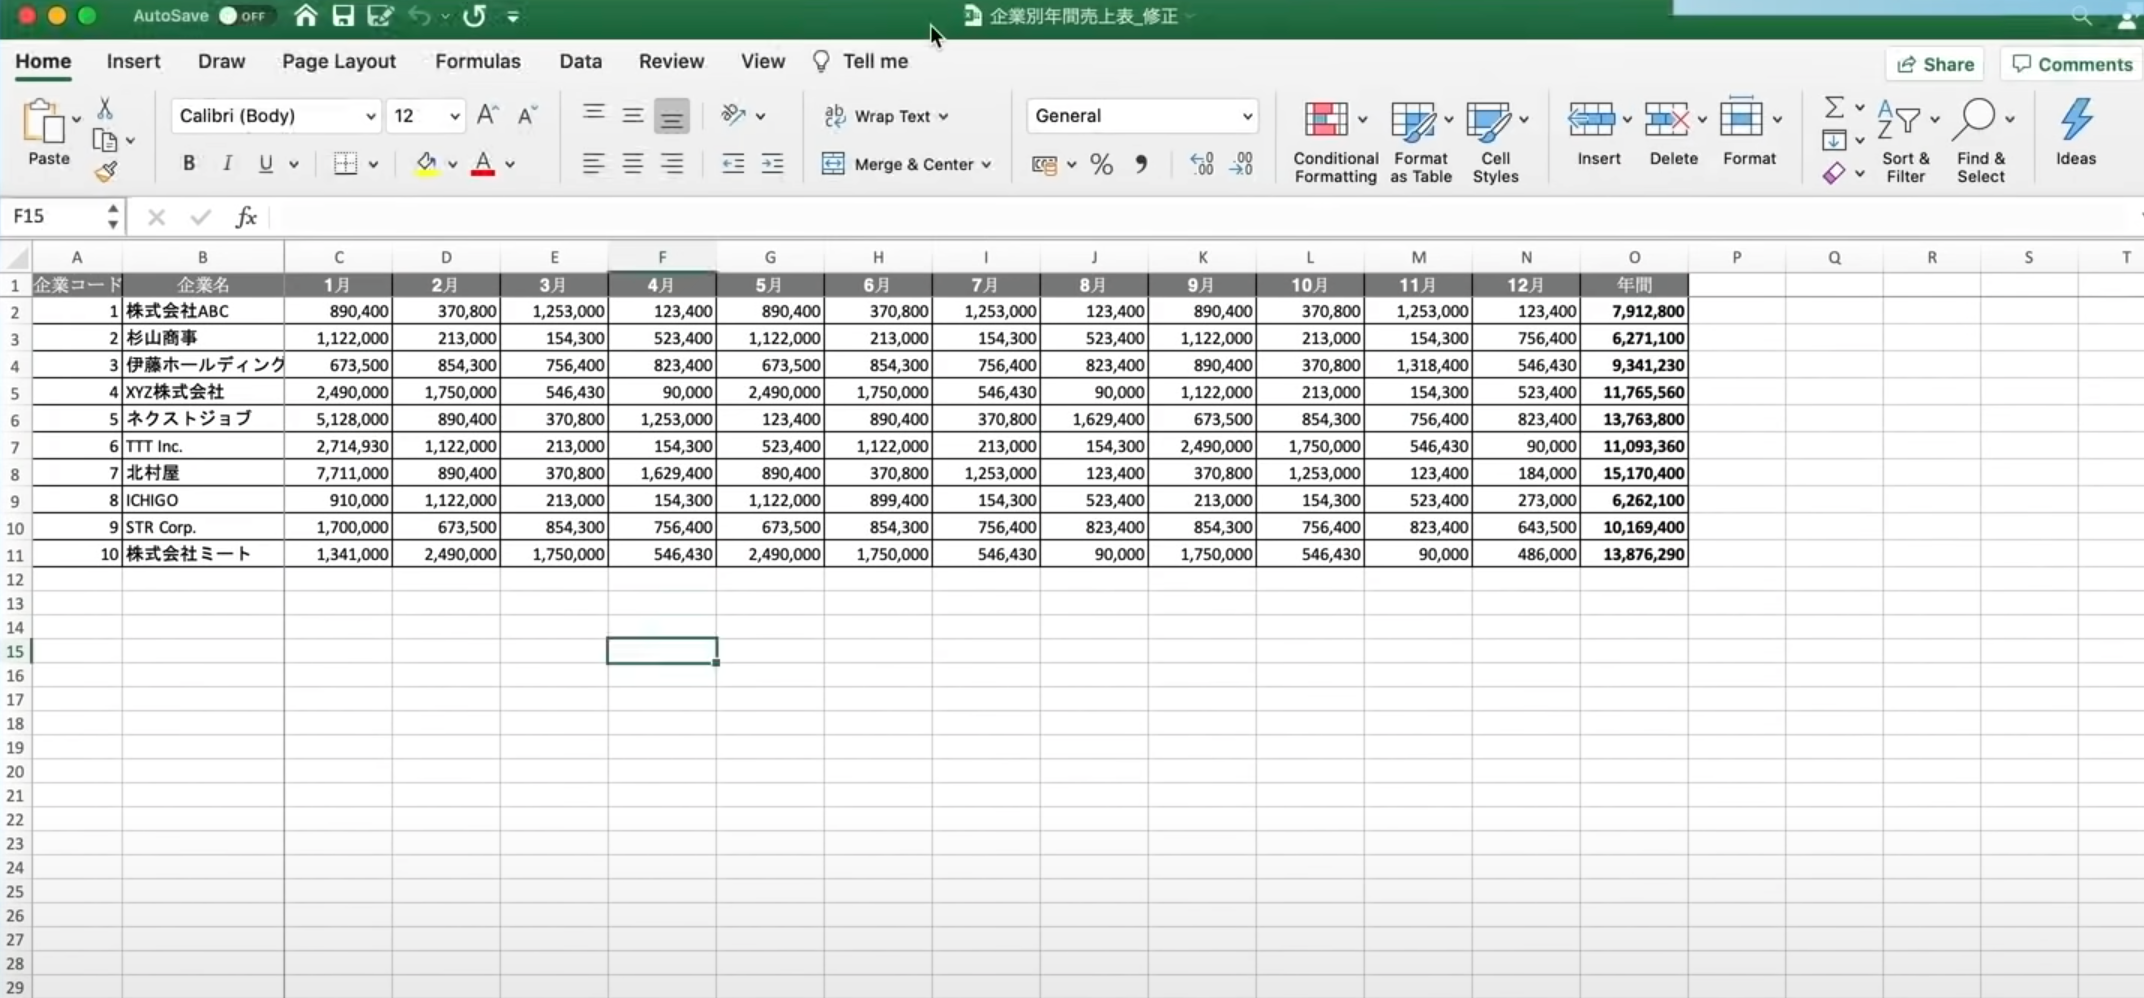

In [69]:
new_filepath = './output/企業別年間売上表_修正.xlsx'
wb.save(new_filepath)

# pdf出力
- openpyxlのライブラリにはPDF書き出し機能がないため、reportlabのライブラリを使用する
- xlwingsというライブラリもあるが、有料版であればpandasでExcelファイルを出力するように、to_pdf()で出力できる

In [72]:
!pip3 install reportlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [74]:
from openpyxl import load_workbook

from reportlab.pdfbase.cidfonts import UnicodeCIDFont
from reportlab.pdfbase import pdfmetrics
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle
from reportlab.lib.pagesizes import A4, landscape
from reportlab.lib import colors

In [82]:
# pdfを出力する関数
def pdf_gen(file_pdf, sh):
    doc = SimpleDocTemplate(file_pdf, pagesize=landscape(A4))  # pdfのサイズをA4横に指定
    fontname_g = 'HeiseiKakuGo-W5'
    pdfmetrics.registerFont(UnicodeCIDFont(fontname_g))  # フォントの指定
    
    elements = []
    data = []  # 全行分のセルの値を格納するリスト
    for row in sh.rows:
        unit_aa = []  # 1行分のセルの値を格納するリスト
        for cell in row:
            unit_aa.append(cell.value)
        data.append(unit_aa)
    tt = Table(data)
    
    # テーブルの書式設定
    tt.setStyle(TableStyle([
        ('BACKGROUND', (0,0), (-1,0), colors.gray),  # ヘッダー行をグレーで塗りつぶし
        ('TEXTCOLOR', (0,0), (-1,0), colors.white),  # ヘッダー行の文字の色を白に
        ('ALIGN', (0,0), (-1,0), 'CENTER'),  # ヘッダー行の文字の位置をセンターに配置
        ('ALIGN', (2,1), (-1,-1), 'RIGHT'),  # 2列1行目=C2セル〜（-1,-1）=最終行列までの文字の位置を右に配置（範囲は1月〜合計列）
        ('ALIGN', (0,1), (0,-1), 'RIGHT'),  # 企業コードの列の位置を右に配置
        ('FONT', (0,0), (-1,-1), 'HeiseiKakuGo-W5', 8.5),  # (0,0)~(-1,-1):全セルに対してフォントと文字サイズを8.5ptに設定
        ('GRID', (0,0), (-1,-1), 0.25, colors.black)  # (0,0)~(-1,-1):全セルに対してフォントと文字サイズを8.5ptに設定  
        ]))
    
    elements.append(tt)
    doc.build(elements)

In [83]:
wb = load_workbook(new_filepath)
sh = wb.active

file_pdf = 'output/output.pdf'

pdf_gen(file_pdf, sh)

完成版
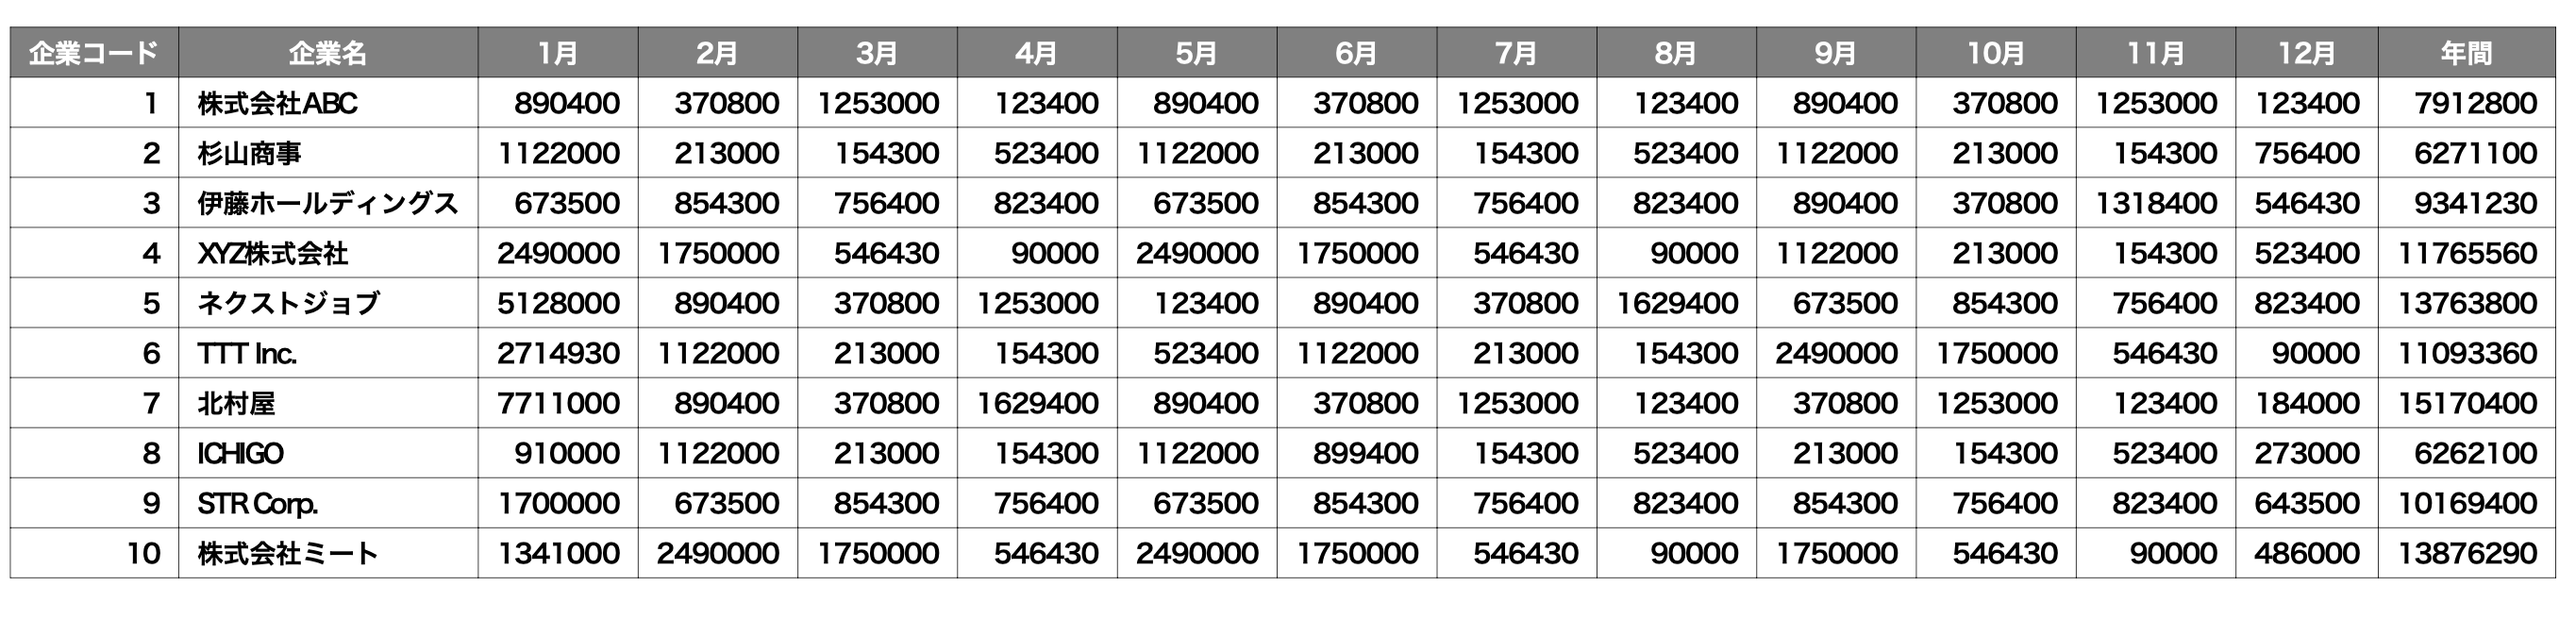